# Sign Language Code Along - Tensorflow and OpenCV (DNN, Dropout, Hyperparameters)

This Code Along will introduces using Tensorflow with the OpenCV library for computer vision. In this code along, we will:

- Extract/Load JPEG images using OpenCV
- Design Deep Neural Network (DNN) with a dropout layer.
- Run DNN with different hyperparameter settings

## Housekeeping (Download/Install)
If you haven't already, you will need to install Tensorflow Jupyter notebook, OpenCV for Python, as well as Python. I recommend Python 3.

For those on Windows 10, you should install Python 3.5 (not 3.6). The Google support blogs still show people continuing to have incompatibility problems with TensorFlow and Python 3.6.

If you already have Python 3.6 loaded, try importing tensorflow first and see if the import is successfully, before deciding to downgrade to 3.5
You should also be using pip version 9. If you are using an older version, you may need to upgrade.

### Python 3.5

You can download Python 3.5 here. Goto the bottom of the page and select the download for your OS.

https://www.python.org/downloads/release/python-350/

If you are not sure which version you have, do the following:

C:> python --version

<span style='color:red; font-weight:bold'>NOTE: If you have Python 2 and 3 installed, then wherever I have python on the command line, replace with python3</span>

### PIP 

To upgrade to the latest verson of PIP (version 9 as of this writing), do the following (below is an example on Windows command prompt).

C:> python -m pip install --upgrade pip 

If you are not sure which version you have, do the following:

C:> pip --version

### Tensorflow

You want to install Tensorflow 1.6 for your platform. Your platform is a combination of your version of python (e.g., cp35) and your OS/Architecture (e.g., cp35m-win_amd64). 

You can find the wheels (.whl) install files for Tensorflow 1.6 here:

https://pypi.python.org/pypi/tensorflow

On my laptop (Win10), I am using:

tensorflow-1.6.0rc1-cp35-cp35m-win_amd64.whl

### Jupyter Notebook

You can install Juypter Notebook as follows:

C:> python -m pip install jupyter


### OpenCV

You can install OpenCV for Python as follows:

C:> pip install opencv-python

<b style='color:red'>NOTE: Do not follow old Python 2.7 instructions (2012). You will download 750Mb and do a bunch of steps.</b>


### Putting it Together

Let's see if everything is installed correctly:

    1. Start python interpreter (REPL) on the command line
    2. Type in import tensorflow
    3. Type in import cv2
    4. There should be no errors in loading the libraries.
    
### Launch Jupyter Notebook

From a command terminal, enter:

C:> jupyter notebook

This will launch a Jupyter notebook in a web browser (whatever is your default web browser). 

#### Create a Notebook

Under the toolbar, select:

File-> New Notebook -> Python 3

A notebook will appear which will look similar to this.

#### Import Tensorflow and OpenCV

In the first input cell, we will import the tensorflow and opencv libraries to verify they are properly installed.

Python execution of the cell should complete without any errors. You may get deprecated warnings, just ignore them. Let me try it below:


In [1]:
# Importing Tensorflow
import tensorflow as tf
# Importing OpenCV
import cv2

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


We will need a few more libraries, so let's load them now.

In [2]:
import os
import numpy as np

## Data Source

Github Public Repository - https://github.com/EvilPort2/Sign-Language

<i>"The first thing I did was, I created 10 gesture samples using OpenCV. For each gesture I captured 1200 images which were 50x50 pixels. All theses images were in grayscale which is stored in the gestures/ folder. The gestures/0/ folder contains 1200 blank images which signify "none" gesture. Also I realised that keeping this category increased my model's accuracy to 99% from a laughable 82%."</i>

Let's go to the downloaded images and see what's there. Let's first check that we are in the correct directory.

In [3]:
pwd

'C:\\Users\\User\\Desktop\\AITraining\\Portland-Data-Science-Group\\Presentations\\CodeAlong\\sign-lang'

You will see under the gestures directory, we have folders 0 through 26. Folder 0 is the none image, while folders 1 through 26 have images for the letters A..Z, respectively.

Let's look under one of the folders (i.e., folder 1 for the letter A):

<img src='gestures.jpg'/>

Let's now use openCV's method imread to read in a JPEG image and convert it to an uncompressed numpy 2D matrix of pixels.

In [4]:
image = cv2.imread("gestures/1/1.jpg", 0)

Let's verify that the image is a numpy matrix as expected. It's type should be numpy.ndarray and it's shape should be 50 x 50 pixels.

In [5]:
print( type(image) )
print( image.shape )

<class 'numpy.ndarray'>
(50, 50)


Let's now look at the contents of the image. As you can see, it is a matrix of values between 0 and 255 (uint8).

In [6]:
image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### Plotting an Image

Let's plot one of the images in the training set. To do so, we will use the plotting functions of the matplotlib package. Let's start by importing the package.

In [7]:
import matplotlib.pyplot as plt

# This line is specific to python notebooks (not python). 
# It causes plots to automatically be rendered (displayed) without issuing a show command.
%matplotlib inline  

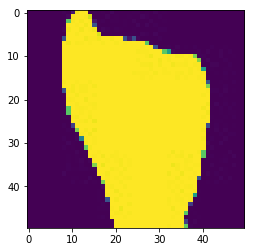

In [8]:
# Let's plot it now
plt.imshow( image )

### Loading the Dataset

The function below traverses the gestures folder for each subfolder (letter in the alphabet) and loads the images and corresponding label (letter), which is obtained from the subfolder name.

In [20]:
def load_dataset( verbose = False ):
    """ Load the Sign Language dataset for the Alphabet """
    images = []
    labels = []
    # Process each subfolder (0..26) in the gestures folder
    for subfolder in os.listdir("gestures"):
        if verbose == True: print("Loading Subfolder", subfolder)
        # There are 1200 images per letter
        for i in range(1200):
            # Read each image in
            image = cv2.imread("gestures/"+ subfolder + "/" + str(i+1) + ".jpg", 0)
            # if bad image, skip
            if np.any(image == None):
                continue
            # add image to image list
            images.append( image )
            # add corresponding label to label list
            labels.append( subfolder )
    # return the list of images and corresponding labels
    return images, labels

Let's now load the images. We will set the parameter verbose to True to see the progress since this will take awhile.

In [10]:
import time
start = time.time()
images, labels = load_dataset( True )
print( "Time to Load Images: ", time.time() - start )

Loading Subfolder 0
Loading Subfolder 1
Loading Subfolder 10
Loading Subfolder 11
Loading Subfolder 12
Loading Subfolder 13
Loading Subfolder 14
Loading Subfolder 15
Loading Subfolder 16
Loading Subfolder 17
Loading Subfolder 18
Loading Subfolder 19
Loading Subfolder 2
Loading Subfolder 20
Loading Subfolder 21
Loading Subfolder 22
Loading Subfolder 23
Loading Subfolder 24
Loading Subfolder 25
Loading Subfolder 26
Loading Subfolder 3
Loading Subfolder 4
Loading Subfolder 5
Loading Subfolder 6
Loading Subfolder 7
Loading Subfolder 8
Loading Subfolder 9
Time to Load Images:  70.56759142875671


Let's see we got what we expected. There are 27 folders (26 letters and None) with 1200 images each. We should have a list of 32,400 (27 * 1200) numpy 2D matrixes (aka the images).

In [13]:
print( len(images) )

32400


Let's now verify that the images (and labels) we read in by plotting one of the images and it's corresponding label.

y = 10


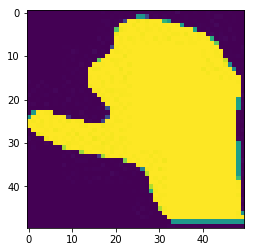

In [19]:
# Let's plot it now
index = 2407
plt.imshow( images[index] )
print ("y = " + str(labels[index]))

### Flatten and Normalize the Image Data

Now we will flatten the data (reshape so all rows follow each other sequential in a single vector) and normalize the pixel values between 0 and 1.

In [21]:
# Flatten the Image Data
images_flatten = images.reshape(images.shape[0], -1).T

# Normalize the Pixel Values between 0 and 1
images = images_flatten / 255.0

AttributeError: 'list' object has no attribute 'reshape'